In [1]:
!pip install prophet


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and preprocess your dataset as before
data = pd.read_csv('STN1.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
full_date_range = pd.date_range(start=data['DATE'].min(), end=data['DATE'].max(), freq='D')
data_full = data.set_index('DATE').reindex(full_date_range).rename_axis('DATE').reset_index()
data_full['FIRECOUNT'] = data_full['FIRECOUNT'].interpolate(method='linear')

# Prepare data for Prophet
prophet_data = data_full.rename(columns={'DATE': 'ds', 'FIRECOUNT': 'y'})[['ds', 'y']]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create future dates and make predictions for the next 3 years
future = model.make_future_dataframe(periods=365 * 3)
forecast = model.predict(future)

# Prepare forecast data for Plotly Express
forecast_plot_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_plot_data = forecast_plot_data.rename(columns={'ds': 'Date', 'yhat': 'Predicted_Firecount', 
                                                        'yhat_lower': 'Lower_CI', 'yhat_upper': 'Upper_CI'})

# Plotting with Plotly Express
fig = px.line(forecast_plot_data, x='Date', y='Predicted_Firecount', 
              title="Firecount Forecast for 2023-2025",
              labels={'Predicted_Firecount': 'Firecount'})

# Add confidence intervals as shaded regions
fig.add_scatter(x=forecast_plot_data['Date'], y=forecast_plot_data['Upper_CI'], 
                mode='lines', line=dict(width=0), showlegend=False)
fig.add_scatter(x=forecast_plot_data['Date'], y=forecast_plot_data['Lower_CI'], 
                mode='lines', fill='tonexty', line=dict(width=0), 
                fillcolor='rgba(173,216,230,0.2)', showlegend=False)

# Display forecasted values as text annotations
fig.update_traces(text=forecast_plot_data['Predicted_Firecount'].round(2), textposition="top right")

# Show the plot
fig.show()

# Calculate and display accuracy metrics for the available historical data
actual = prophet_data['y']
predicted = forecast.loc[:len(actual)-1, 'yhat']  # Match the length of the actual data

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = mse ** 0.5

# Print actual vs. predicted sample and accuracy
print("Sample of Actual vs. Predicted Values:")
print(pd.DataFrame({'Date': prophet_data['ds'].tail(5),
                    'Actual Firecount': actual.tail(5),
                    'Predicted Firecount': predicted.tail(5)}))

print(f"\nAccuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


13:03:10 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing


Sample of Actual vs. Predicted Values:
           Date  Actual Firecount  Predicted Firecount
3404 2021-12-27              23.0           192.646935
3405 2021-12-28              22.0           176.543532
3406 2021-12-29              23.0           166.165188
3407 2021-12-30               6.0           136.542550
3408 2021-12-31              14.0           133.559831

Accuracy Metrics:
Mean Absolute Error (MAE): 198.20213096498026
Root Mean Squared Error (RMSE): 449.50887563000316


In [8]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set Pandas options to display all rows and columns in DataFrame outputs
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width

# Load and preprocess your dataset as before
data = pd.read_csv('STN1.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
full_date_range = pd.date_range(start=data['DATE'].min(), end=data['DATE'].max(), freq='D')
data_full = data.set_index('DATE').reindex(full_date_range).rename_axis('DATE').reset_index()
data_full['FIRECOUNT'] = data_full['FIRECOUNT'].interpolate(method='linear')

# Prepare data for Prophet
prophet_data = data_full.rename(columns={'DATE': 'ds', 'FIRECOUNT': 'y'})[['ds', 'y']]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create future dates and make predictions for the next 3 years
future = model.make_future_dataframe(periods=365 * 3)
forecast = model.predict(future)

# Prepare forecast data for Plotly Express
forecast_plot_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_plot_data = forecast_plot_data.rename(columns={'ds': 'Date', 'yhat': 'Predicted_Firecount', 
                                                        'yhat_lower': 'Lower_CI', 'yhat_upper': 'Upper_CI'})

# Plotting with Plotly Express
fig = px.line(forecast_plot_data, x='Date', y='Predicted_Firecount', 
              title="Firecount Forecast for 2023-2025",
              labels={'Predicted_Firecount': 'Firecount'})

# Add confidence intervals as shaded regions
fig.add_scatter(x=forecast_plot_data['Date'], y=forecast_plot_data['Upper_CI'], 
                mode='lines', line=dict(width=0), showlegend=False)
fig.add_scatter(x=forecast_plot_data['Date'], y=forecast_plot_data['Lower_CI'], 
                mode='lines', fill='tonexty', line=dict(width=0), 
                fillcolor='rgba(173,216,230,0.2)', showlegend=False)

# Display forecasted values as text annotations
fig.update_traces(text=forecast_plot_data['Predicted_Firecount'].round(2), textposition="top right")

# Show the plot
fig.show()

# Calculate and display accuracy metrics for the available historical data
actual = prophet_data['y']
predicted = forecast.loc[:len(actual)-1, 'yhat']  # Match the length of the actual data

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = mse ** 0.5

# Print actual vs. predicted sample and accuracy
#print("Sample of Actual vs. Predicted Values:")
#print(pd.DataFrame({'Date': prophet_data['ds'],  # Full output of all dates
#                    'Actual Firecount': actual,
#                    'Predicted Firecount': predicted}))

print(f"\nAccuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Reset options after use if needed
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_colwidth')


14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1] done processing



Accuracy Metrics:
Mean Absolute Error (MAE): 198.20213096498026
Root Mean Squared Error (RMSE): 449.50887563000316


In [7]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set Pandas options to display all rows and columns in DataFrame outputs
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width

# Load and preprocess your dataset as before
data = pd.read_csv('STN1.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
full_date_range = pd.date_range(start=data['DATE'].min(), end=data['DATE'].max(), freq='D')
data_full = data.set_index('DATE').reindex(full_date_range).rename_axis('DATE').reset_index()
data_full['FIRECOUNT'] = data_full['FIRECOUNT'].interpolate(method='linear')

# Prepare data for Prophet
prophet_data = data_full.rename(columns={'DATE': 'ds', 'FIRECOUNT': 'y'})[['ds', 'y']]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create future dates and make predictions for the next 3 years
future = model.make_future_dataframe(periods=365 * 3)
forecast = model.predict(future)

# Prepare forecast data for Plotly Express
forecast_plot_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_plot_data = forecast_plot_data.rename(columns={'ds': 'Date', 'yhat': 'Predicted_Firecount', 
                                                        'yhat_lower': 'Lower_CI', 'yhat_upper': 'Upper_CI'})

# Plotting with Plotly Express
fig = px.line(forecast_plot_data, x='Date', y='Predicted_Firecount', 
              title="Firecount Forecast for 2023-2025",
              labels={'Predicted_Firecount': 'Firecount'})

# Add confidence intervals as shaded regions
fig.add_scatter(x=forecast_plot_data['Date'], y=forecast_plot_data['Upper_CI'], 
                mode='lines', line=dict(width=0), showlegend=False)
fig.add_scatter(x=forecast_plot_data['Date'], y=forecast_plot_data['Lower_CI'], 
                mode='lines', fill='tonexty', line=dict(width=0), 
                fillcolor='rgba(173,216,230,0.2)', showlegend=False)

# Display forecasted values as text annotations
fig.update_traces(text=forecast_plot_data['Predicted_Firecount'].round(2), textposition="top right")

# Show the plot
fig.show()

# Calculate and display accuracy metrics for the available historical data
actual = prophet_data['y']
predicted = forecast.loc[:len(actual)-1, 'yhat']  # Match the length of the actual data

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = mse ** 0.5

# Print actual vs. predicted sample and accuracy
#print("Sample of Actual vs. Predicted Values:")
#print(pd.DataFrame({'Date': prophet_data['ds'],  # Full output of all dates
#                    'Actual Firecount': actual,
#                    'Predicted Firecount': predicted}))

print(f"\nAccuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Forecast for the next 48 months (4 years)
forecast_period = 48
forecast_for_2022_2025 = forecast[['ds', 'yhat']].tail(forecast_period)

# Create forecast date index for 2022-2025
forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_period, freq='M')
forecast_series = pd.Series(forecast_for_2022_2025['yhat'].values, index=forecast_dates)

# Display predictions for each year
for year in range(2022, 2026):
    value = forecast_series[forecast_series.index.year == year].mean()
    print(f"The predicted value for {year} is {value:.2f}")

# Reset options after use if needed
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_colwidth')


14:11:17 - cmdstanpy - INFO - Chain [1] start processing
14:11:17 - cmdstanpy - INFO - Chain [1] done processing



Accuracy Metrics:
Mean Absolute Error (MAE): 198.20213096498026
Root Mean Squared Error (RMSE): 449.50887563000316
The predicted value for 2022 is 1187.95
The predicted value for 2023 is 359.26
The predicted value for 2024 is 486.36
The predicted value for 2025 is 498.66


C:\Users\goelk\AppData\Local\Temp\ipykernel_2916\4214383540.py:75: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [1]:
 import pandas as pd

# Define the mean and mode values
mean_values = {
    'FIRECOUNT': 638.842308,
    'WD': 229.823077,
    'RH': 63.243308,
    'WS': 0.900269,
    'AT': 18.623577,
    'GSDP': 730070.815385,
    'GSVA': 639476.373077,
    'GSDP_CAP': 373109.334615,
    'HDI': 0.739408,
    'PM10': 437.082077,
    'PM25': 217.832462,
    'CO': 2.706615,
    'NO2': 103.657808,
    'SO2': 17.250154
}

mode_values = {
    'FIRECOUNT': 1.000,
    'WD': 245.090,
    'RH': 71.930,
    'WS': 0.610,
    'AT': 11.780,
    'GSDP': 830872.000,
    'GSVA': 736717.000,
    'GSDP_CAP': 414710.000,
    'HDI': 0.746,
    'PM10': 275.880,
    'PM25': 13.260,
    'CO': 2.290,
    'NO2': 134.310,
    'SO2': 6.460
}

# Create a DataFrame
data = pd.DataFrame({
    'Mean': mean_values,
    'Mode': mode_values
}).T  # Transpose to switch rows and columns

# Display the table
import plotly.express as px
fig = px.imshow(data, text_auto=True, aspect="auto", title="Mean and Mode Values for Dataset 1")
fig.show()


Mean values for Dataset 1:
 FIRECOUNT       638.842308
WD              229.823077
RH               63.243308
WS                0.900269
AT               18.623577
GSDP         730070.815385
GSVA         639476.373077
GSDP_CAP     373109.334615
HDI               0.739408
PM10            437.082077
PM25            217.832462
CO                2.706615
NO2             103.657808
SO2              17.250154
dtype: float64

Mode values for Dataset 1:
 FIRECOUNT         1.000
WD              245.090
RH               71.930
WS                0.610
AT               11.780
GSDP         830872.000
GSVA         736717.000
GSDP_CAP     414710.000
HDI               0.746
PM10            275.880
PM25             13.260
CO                2.290
NO2             134.310
SO2               6.460
Name: 0, dtype: float64


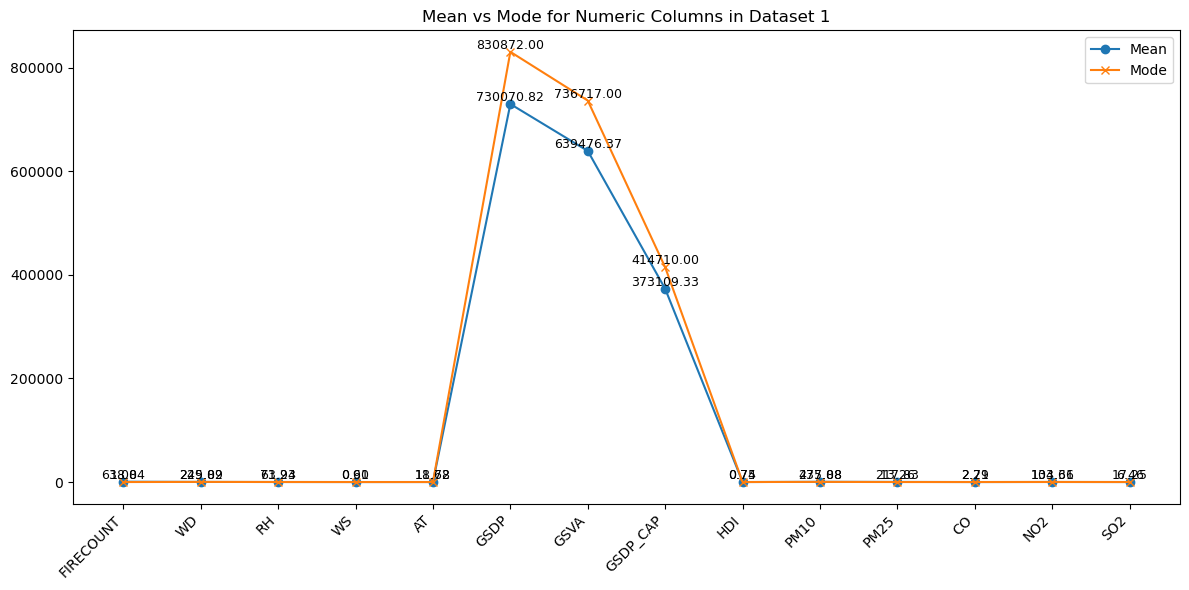

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
file_path1 = 'D:\\stubble buring\\stubble\\STN1.csv'
df1 = pd.read_csv(file_path1)

# 1. Remove NaN values 
df1_cleaned = df1.dropna()

# 2. Select only numeric columns for mean and mode calculation
numeric_df1 = df1_cleaned.select_dtypes(include='number')

# 3. Calculate the mean value for each numeric column
mean_values_df1 = numeric_df1.mean()

# 4. Calculate the mode value for each numeric column
mode_values_df1 = numeric_df1.mode().iloc[0]

# Display the mean and mode values
print("Mean values for Dataset 1:\n", mean_values_df1)
print("\nMode values for Dataset 1:\n", mode_values_df1)

# 5. Simple plotting method - Mean vs Mode for the dataset
plt.figure(figsize=(12, 6))

# Plot Mean and Mode values
plt.plot(mean_values_df1, label='Mean', marker='o')
plt.plot(mode_values_df1, label='Mode', marker='x')
plt.title('Mean vs Mode for Numeric Columns in Dataset 1')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Annotating actual values of Mean and Mode
for i, value in enumerate(mean_values_df1):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

for i, value in enumerate(mode_values_df1):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Load the first dataset
file_path1 = 'D:\\stubble buring\\stubble\\STN1.csv'
df1 = pd.read_csv(file_path1)

# 1. Remove NaN values 
df1_cleaned = df1.dropna()

# 2. Select only numeric columns for mean and mode calculation
numeric_df1 = df1_cleaned.select_dtypes(include='number')

# 3. Calculate the overall mean value across all numeric columns
overall_mean = numeric_df1.mean().mean()

# 4. Calculate the overall mode value (mode of all values combined across numeric columns)
overall_mode = numeric_df1.mode().iloc[0].mean()

# Display the overall mean and mode values
print(f"Overall Mean Value: {overall_mean:.2f}")
print(f"Overall Mode Value: {overall_mode:.2f}")


Overall Mean Value: 124599.09
Overall Mode Value: 141647.31


In [3]:
import pandas as pd

# Load the first dataset
file_path1 = 'D:\\stubble buring\\stubble\\STN2.csv'
df1 = pd.read_csv(file_path1)

# 1. Remove NaN values 
df1_cleaned = df1.dropna()

# 2. Select only numeric columns for mean and mode calculation
numeric_df1 = df1_cleaned.select_dtypes(include='number')

# 3. Calculate the overall mean value across all numeric columns
overall_mean = numeric_df1.mean().mean()

# 4. Calculate the overall mode value (mode of all values combined across numeric columns)
overall_mode = numeric_df1.mode().iloc[0].mean()

# Display the overall mean and mode values
print(f"Overall Mean Value: {overall_mean:.2f}")
print(f"Overall Mode Value: {overall_mode:.2f}")


Overall Mean Value: 132223.16
Overall Mode Value: 132171.75


In [4]:
import pandas as pd

# Load the first dataset
file_path1 = 'D:\\stubble buring\\stubble\\STN3.csv'
df1 = pd.read_csv(file_path1)

# 1. Remove NaN values 
df1_cleaned = df1.dropna()

# 2. Select only numeric columns for mean and mode calculation
numeric_df1 = df1_cleaned.select_dtypes(include='number')

# 3. Calculate the overall mean value across all numeric columns
overall_mean = numeric_df1.mean().mean()

# 4. Calculate the overall mode value (mode of all values combined across numeric columns)
overall_mode = numeric_df1.mode().iloc[0].mean()

# Display the overall mean and mode values
print(f"Overall Mean Value: {overall_mean:.2f}")
print(f"Overall Mode Value: {overall_mode:.2f}")


Overall Mean Value: 100846.00
Overall Mode Value: 116702.74


In [5]:
import pandas as pd

# Load the first dataset
file_path1 = 'D:\\stubble buring\\stubble\\STN4.csv'
df1 = pd.read_csv(file_path1)

# 1. Remove NaN values 
df1_cleaned = df1.dropna()

# 2. Select only numeric columns for mean and mode calculation
numeric_df1 = df1_cleaned.select_dtypes(include='number')

# 3. Calculate the overall mean value across all numeric columns
overall_mean = numeric_df1.mean().mean()

# 4. Calculate the overall mode value (mode of all values combined across numeric columns)
overall_mode = numeric_df1.mode().iloc[0].mean()

# Display the overall mean and mode values
print(f"Overall Mean Value: {overall_mean:.2f}")
print(f"Overall Mode Value: {overall_mode:.2f}")


Overall Mean Value: 115485.07
Overall Mode Value: 132199.60


In [7]:
import pandas as pd

# Load the first dataset
file_path1 = 'D:\\stubble buring\\stubble\\STN5.csv'
df1 = pd.read_csv(file_path1)

# 1. Remove NaN values 
df1_cleaned = df1.dropna()

# 2. Select only numeric columns for mean and mode calculation
numeric_df1 = df1_cleaned.select_dtypes(include='number')

# 3. Calculate the overall mean value across all numeric columns
overall_mean = numeric_df1.mean().mean()

# 4. Calculate the overall mode value
mode_values_df1 = numeric_df1.mode()

# Check if mode values exist
if not mode_values_df1.empty:
    overall_mode = mode_values_df1.iloc[0].mean()
else:
    overall_mode = None  # If no mode exists

# Display the overall mean and mode values
print(f"Overall Mean Value: {overall_mean:.2f}")
if overall_mode is not None:
    print(f"Overall Mode Value: {overall_mode:.2f}")
else:
    print("Overall Mode Value: No mode available")


Overall Mean Value: nan
Overall Mode Value: No mode available
